# GANomaly Notes

In these notes, we analyze the GANomaly paper by 
S. Akcay et al https://arxiv.org/abs/1805.06725
and the associated package 
 https://github.com/samet-akcay/ganomaly.

## Importing the Module and Examining Its Contents

In this section, we import the ganomaly package that has been downloaded from https://github.com/samet-akcay/ganomaly and we examine its contents. First, we set the location of the download.

In [ ]:
import os
ganomalyPath = os.environ['HOME'] + '/PycharmProjects/ganomaly-master'

In [ ]:
ganomalyPath

Note that the name of the package is 'lib' as we can see from the import statements at the top level script https://github.com/samet-akcay/ganomaly/blob/master/train.py.
Alternatively, lib is the only subdirectory with an __init__.py file in it.

In [ ]:
#os.listdir( ganomalyPath )
[f for f in os.listdir( ganomalyPath ) if not (f.startswith('_') and not f.startswith('__init__'))]

In [ ]:
#import os
#os.listdir( ganomalyPath  + '/lib')

#os.listdir( ganomalyPath  + '/lib')
#[f for f in os.listdir( ganomalyPath  + '/lib') if not (f.startswith('_') and f!='__init__.py')]

#[f for f in os.listdir( ganomalyPath  + '/lib') if not (f.startswith('_') and f!='__init__.py')]
[f for f in os.listdir( ganomalyPath  + '/lib') if not (f.startswith('_') and not f.startswith('__init__'))]

### Import

The package must be in one of the paths in sys.path.  Setting up sys.path is best done in an initialization script like startup.py but to keep things simple here we do it directly.

In [5]:
import sys

if not ( ganomalyPath in sys.path ) :
    sys.path.append( ganomalyPath )    
        
import lib
# inspect 
sys.path

['/Users/dionelisnikolaos/anaconda3/lib/python36.zip',
 '/Users/dionelisnikolaos/anaconda3/lib/python3.6',
 '/Users/dionelisnikolaos/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/Users/dionelisnikolaos/.local/lib/python3.6/site-packages',
 '/Users/dionelisnikolaos/anaconda3/lib/python3.6/site-packages',
 '/Users/dionelisnikolaos/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/dionelisnikolaos/speech_feature_extraction',
 '/Users/dionelisnikolaos/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/dionelisnikolaos/.ipython',
 '/Users/dionelisnikolaos/PycharmProjects/ganomaly-master']

### Examine lib

There are a couple of ways to quickly find out what's in a packge.
Here we are primarily interested in the constituent modules and their contents.
First we use pkgutil.  

In [6]:
import pkgutil

for importer, modname, ispkg in pkgutil.iter_modules( lib.__path__):
    print(  " %s, %s, %s" % ( importer, modname, ispkg ) )

 FileFinder('/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/lib'), data, False
 FileFinder('/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/lib'), evaluate, False
 FileFinder('/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/lib'), loss, False
 FileFinder('/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/lib'), model, False
 FileFinder('/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/lib'), networks, False
 FileFinder('/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/lib'), visualizer, False


A second way to examine the contents of a package is via the package pydeps. The installation details are in https://github.com/thebjorn/pydeps.

In [7]:
#pydepsOut = '/PycharmProjects/tmp/pydeps.svg'
pydepsOut = os.environ['HOME'] + '/PycharmProjects/pydeps.svg'

#pydepsOut = os.environ['HOME'] + '/PycharmProjects/pydeps.svg'
pydepsIn = "\'%s\'" % ( ganomalyPath + '/train.py' )

import subprocess
from subprocess import call

subprocess.check_call( "pydeps "
                       "--debug "
                       "--max-bacon 3 "
                       "--exclude scipy tqdm numpy torch torchvision" #torch torchvision
                       "--noise-level 6 "
                       "--noshow "
                       "--show-deps "
                       "-o " + pydepsOut + " " +
                       pydepsIn + " " 
                       , shell = True
                       #  , stderr = subprocess.STDOUT
)

#subprocess.call( "pydeps "
#                 "--debug "
#                 "--max-bacon 3 "
#                 "--exclude numpy scipy tqdm" # torch torchvision
#                 "--noise-level 3 "
#                 "--noshow "
#                 "--show-deps "
#                 "-o " + pydepsOut + " "
#                 "'/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/train.py'"
#                 , shell=True
#)

#subprocess.call( "pydeps "
#                 "--debug "
#                 "--max-bacon 3 "
#                 "--exclude numpy scipy  tqdm " #torch torchvision
#                 "--noise-level 3 "
#                 "--noshow "
#                 "--show-deps "
#                 "-o " + pydepsOut + " "
#                 "'/Users/dionelisnikolaos/PycharmProjects/ganomaly-master/train.py'"
#                 , shell=True
#)

#pydepsOut = '/home/lockengines0/tmp/pydeps.svg'

#from subprocess import call
#subprocess.call( "pydeps "
#                 "--debug "
#                 "--max-bacon 3 "
#                 "--exclude numpy scipy  tqdm " #torch torchvision
#                 "--noise-level 3 "
#                 "--noshow "
#                 "--show-deps "
#                 "-o " + pydepsOut + " "
#                 "'/home/lockengines0/Downloads/ganomaly-master/train.py'"
#                 , shell=True
#)

0

In [8]:
from IPython.display import HTML
style = "<style>svg{width:500px !important; height:500px !important;} </style>"
HTML(style)

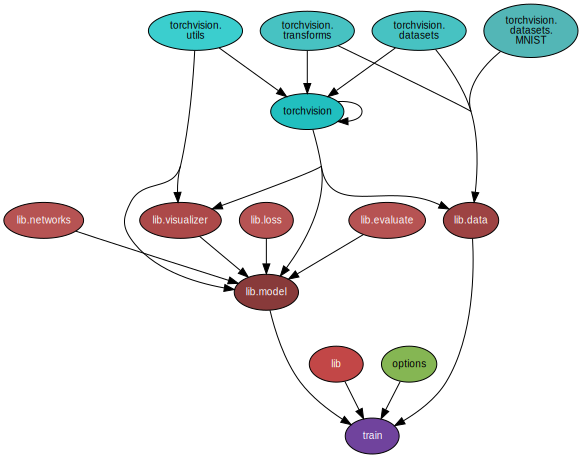

In [9]:
# display in cell
from IPython.core.display import SVG
SVG(filename=pydepsOut)

### Function Call Graph

Below we will use the pycallgraph package http://pycallgraph.slowchop.com/en/master/ to explore the class and function interrelations inside each module.

### The List of Modules

The above graph gives us both the list of modules in lib and their inter-dependencies.  We can examine the modules in any order that respects these dependencies so we choose

    1. evaluate 
    2. loss
    3. data
    4. networks
    5. visualizer
    6. model
    7. train
    
 and in the following sections we proceed to examine them in turn.

## Module lib.evaluate

In [10]:
#os.listdir( ganomalyPath + '/lib')
#os.listdir( ganomalyPath + '/lib.evaluate.py')

#dir( lib.evaluate )
#dir( 'lib.evaluate' )

import lib.evaluate
#dir( lib.evaluate )

#dir( lib.evaluate )
[f for f in dir(lib.evaluate) if not (f.startswith('_') and f!='__init__')]

['auc',
 'auprc',
 'average_precision_score',
 'brentq',
 'evaluate',
 'f1_score',
 'interp1d',
 'os',
 'plt',
 'print_function',
 'rc',
 'roc',
 'roc_curve']

In [11]:
# From the previous cell, we see that we have zero classes in lib.evaluate.
# We have zero classes: lib.evaluate has zero classes/objects with functions.


## Module lib.loss

In [12]:
import lib.loss
#dir( lib.loss )

#dir( lib.loss )
[f for f in dir( lib.loss ) if not (f.startswith('_') and f!='__init__')]

['l1_loss', 'l2_loss', 'torch']

In [13]:
# From the previous cell, we see that we have zero classes in lib.loss.
# We have zero classes: lib.loss has zero classes/objects with functions.


## Module lib.data

In [14]:
#dir( 'lib.data' )

import lib.data
#dir( lib.data )

#dir( lib.data )
[f for f in dir( lib.data ) if not (f.startswith('_') and f!='__init__')]

['CIFAR10',
 'ImageFolder',
 'MNIST',
 'datasets',
 'get_cifar_anomaly_dataset',
 'get_mnist2_anomaly_dataset',
 'get_mnist_anomaly_dataset',
 'load_data',
 'np',
 'os',
 'torch',
 'transforms']

## Module lib.networks

In [15]:
#dir( 'lib.networks' )

import lib.networks
#dir( lib.networks )

#dir( lib.networks )
[f for f in dir( lib.networks ) if not (f.startswith('_') and f!='__init__')]

['Decoder', 'Encoder', 'NetD', 'NetG', 'nn', 'torch', 'weights_init']

In [16]:
# From the previous cell, we see that we have 4 classes in lib.networks.
# We have 4 classes: lib.networks has 4 classes (i.e. objects) with functions.

# The 4 classes are: Decoder, Encoder, NetD, NetG.

In [17]:
from lib.networks import Decoder
#dir( Decoder )

#dir( Decoder )
[f for f in dir( Decoder ) if not (f.startswith('_') and f!='__init__')]

['__init__',
 'add_module',
 'apply',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'load_state_dict',
 'modules',
 'named_children',
 'named_modules',
 'named_parameters',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'share_memory',
 'state_dict',
 'to',
 'train',
 'type',
 'zero_grad']

In [18]:
from lib.networks import Encoder
#dir( Encoder )

#dir( Encoder )
[f for f in dir( Encoder ) if not (f.startswith('_') and f!='__init__')]

['__init__',
 'add_module',
 'apply',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'load_state_dict',
 'modules',
 'named_children',
 'named_modules',
 'named_parameters',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'share_memory',
 'state_dict',
 'to',
 'train',
 'type',
 'zero_grad']

In [19]:
from lib.networks import NetD
#dir( NetD )

#dir( NetD )
[f for f in dir( NetD ) if not (f.startswith('_') and f!='__init__')]

['__init__',
 'add_module',
 'apply',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'load_state_dict',
 'modules',
 'named_children',
 'named_modules',
 'named_parameters',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'share_memory',
 'state_dict',
 'to',
 'train',
 'type',
 'zero_grad']

In [20]:
from lib.networks import NetG
#dir( NetG )

#dir( NetG )
[f for f in dir( NetG ) if not (f.startswith('_') and f!='__init__')]

['__init__',
 'add_module',
 'apply',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'load_state_dict',
 'modules',
 'named_children',
 'named_modules',
 'named_parameters',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'share_memory',
 'state_dict',
 'to',
 'train',
 'type',
 'zero_grad']

## Module lib.visualizer

In [21]:
import lib.visualizer
#dir( lib.visualizer )

#dir( lib.visualizer )
[f for f in dir( lib.visualizer ) if not (f.startswith('_') and f!='__init__')]

['Visualizer', 'np', 'os', 'time', 'vutils']

In [22]:
# From the previous cell, we see that Visualizer is a class.
# We have one class: Visualizer is a class (i.e. an object) that has functions.

from lib.visualizer import Visualizer
#dir( Visualizer )

#dir( Visualizer )
[f for f in dir( Visualizer ) if not (f.startswith('_') and f!='__init__')]

['__init__',
 'display_current_images',
 'normalize',
 'plot_current_errors',
 'plot_performance',
 'print_current_errors',
 'print_current_performance',
 'save_current_images']

## Module lib.model

In [23]:
import lib.model
#dir( lib.model )

#dir( lib.model )
[f for f in dir( lib.model ) if not (f.startswith('_') and f!='__init__')]

['Ganomaly',
 'NetD',
 'NetG',
 'OrderedDict',
 'Variable',
 'Visualizer',
 'evaluate',
 'l2_loss',
 'nn',
 'np',
 'optim',
 'os',
 'time',
 'torch',
 'tqdm',
 'vutils',
 'weights_init']

In [24]:
from lib.model import Ganomaly
#dir( Ganomaly )

#dir( Ganomaly )
[f for f in dir( Ganomaly ) if not (f.startswith('_') and f!='__init__')]

['__init__',
 'get_current_images',
 'get_errors',
 'name',
 'optimize',
 'reinitialize_netd',
 'save_weights',
 'set_input',
 'test',
 'train',
 'train_epoch',
 'update_netd',
 'update_netg']

## Module train

Find all symbols in train.py

In [25]:
from options import Options
#dir( Options )

#dir( Options )
[f for f in dir( Options ) if not (f.startswith('_') and f!='__init__')]

['__init__', 'parse']

In [26]:
#import train
#dir( train )

In [27]:
#import train.py
#dir( train.py )

In [28]:
#[f for f in dir(Options) if not f.startswith('_')]
#[f for f in dir(Options) if not (f.startswith('_') and f!='__init__')]

#[f for f in dir(Options) if not (f.startswith('_') and f!='__init__')]
#[f for f in dir(Options) if not (f.startswith('_') and f!='__init__')]